In [1]:
from mempyDEB.DEBIBM.defaultparams import *
from mempyDEB.DEBIBM.simulators import *

In [2]:
p = defaultparams_DEBIBM

In [ ]:

p.glb['tspan'] = (0,56)
sim = simulate_DEBIBM(p)

  0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\Simon\AppData\Roaming\Python\Python312\site-packages\mesa\agent.py:52: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  self.model.register_agent(self)
 33%|███▎      | 1/3 [00:37<01:15, 37.64s/it]C:\Users\Simon\AppData\Roaming\Python\Python312\site-packages\mesa\agent.py:52: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  self.model.register_agent(self)
 67%|██████▋   | 2/3 [01:16<00:38, 38.21s/it]C:\Users\Simon\AppData\Roaming\Python\Python312\site-packages\mesa\agent.py:52: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  self.model.register_agent(self)
100%|██████████| 3/3 [01:44<00:00, 34.80s/it]


<Axes: xlabel='t_day', ylabel='N_tot'>

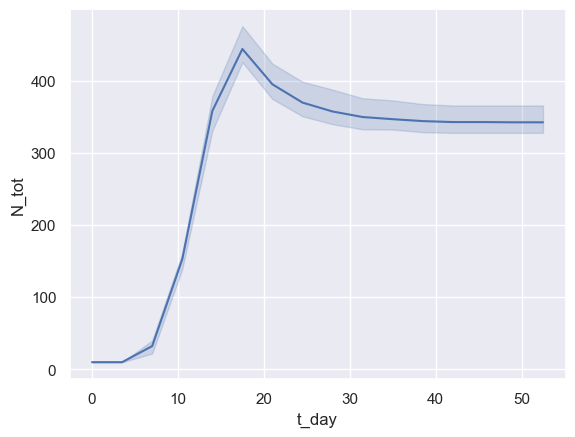

In [3]:
sns.lineplot(sim.mout, x = 't_day', y = 'N_tot')

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
p.glb['tspan'] = (0,21)
p.spc['ED50_h'] = 1e10 # turning direct lethal effects off

for pmoa in ['G', 'M', 'A', 'R']: # iterate over all pmoas
    print(f'Simulating pmoa {pmoa}')
    spc['pmoa'] = pmoa # update agent dictionary
    simout = exposure_DEBIBM(p, [0, 0.125, 0.5]) # run the simulation
    
    # plot the results and save to file

    fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize = (9,7.5), sharex = True)
    ax = np.ravel(ax)
    pal = sns.color_palette()[0:5]

    sns.lineplot(simout.mout, x = 't_day', y = 'M_tot', hue = 'C_W', ax = ax[0], palette = pal)
    sns.lineplot(simout.mout, x = 't_day', y = 'N_tot', hue = 'C_W', ax = ax[1], palette = pal)

    # plot averages of state variables which may be affected through different pmoas
    sns.lineplot(simout.aout, x = 't_day', y = 'eta_AS', hue = 'C_W', ax = ax[2], palette = pal)
    sns.lineplot(simout.aout, x = 't_day', y = 'k_M', hue = 'C_W', ax = ax[3], palette = pal)
    sns.lineplot(simout.aout, x = 't_day', y = 'eta_IA', hue = 'C_W', ax = ax[4], palette = pal)
    sns.lineplot(simout.aout, x = 't_day', y = 'eta_AR', hue = 'C_W', ax = ax[5], palette = pal)

    sns.lineplot(simout.mout, x = 't_day', y = 'aging_mortality', hue = 'C_W', ax = ax[6], palette = pal)
    sns.lineplot(simout.mout, x = 't_day', y = 'starvation_mortality', hue = 'C_W', ax = ax[7], palette = pal)
    sns.lineplot(simout.mout, x = 't_day', y = 'toxicity_mortality', hue = 'C_W', ax = ax[8], palette = pal)

    ax[0].set(xlabel = "Time (d)", ylabel = r"$M\ (\mu gC)$", title = "Total biomass", xticks = np.arange(0, glb['tspan'][1], 56))
    ax[1].set(xlabel = "Time (d)", ylabel = r"$N\ (\#)$", title = "Abundance")
    ax[2].set(xlabel = "Time (d)", ylabel = r"$\eta_{AS}\ (-)$", title = "Growth efficiency", ylim = (0, 1.01))
    ax[3].set(xlabel = "Time (d)", ylabel = r"$k_M\ (d^{-1})$", title = "Maintenance costs")
    ax[4].set(xlabel = "Time (d)", ylabel = r"$\eta_{IA}\ (-)$", title = "Assimilation efficiency", ylim = (0, 1.01))
    ax[5].set(xlabel = "Time (d)", ylabel = r"$\eta_{AR}\ (-)$", title = "Reproduction efficiency", ylim = (0, 1.01))
    ax[6].set(xlabel = "Time (d)", ylabel = "Cumulative count", title = "Aging mortality")
    ax[7].set(xlabel = "Time (d)", ylabel = "Cumulative count", title = "Starvation mortality")
    ax[8].set(xlabel = "Time (d)", ylabel = "Cumulative count", title = "Toxicity mortality")

    [plt.gcf().get_axes()[i].legend().remove() for i in range(len(ax[1:]))]
    plt.tight_layout()
    sns.despine()
    #plt.savefig(os.path.join(plotsdir, f"implementation_verification_poptktd_pmoa={spc['pmoa']}"), dpi = 300)


Simulating pmoa G


  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Simon\AppData\Roaming\Python\Python312\site-packages\mesa\agent.py:52: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  self.model.register_agent(self)
 33%|███▎      | 1/3 [00:11<00:22, 11.36s/it]C:\Users\Simon\AppData\Roaming\Python\Python312\site-packages\mesa\agent.py:52: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  self.model.register_agent(self)
 67%|██████▋   | 2/3 [00:20<00:09,  9.79s/it]C:\Users\Simon\AppData\Roaming\Python\Python312\site-packages\mesa\agent.py:52: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  self.model.register_agent(self)
  0%|          | 0/3 [00:00<?, ?it/s

Simulating pmoa M


  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Simon\AppData\Roaming\Python\Python312\site-packages\mesa\agent.py:52: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  self.model.register_agent(self)
 33%|███▎      | 1/3 [00:07<00:15,  7.58s/it]C:\Users\Simon\AppData\Roaming\Python\Python312\site-packages\mesa\agent.py:52: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  self.model.register_agent(self)
 67%|██████▋   | 2/3 [00:15<00:07,  7.52s/it]C:\Users\Simon\AppData\Roaming\Python\Python312\site-packages\mesa\agent.py:52: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  self.model.register_agent(self)
  0%|          | 0/3 [00:00<?, ?it/s

Simulating pmoa A


  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Simon\AppData\Roaming\Python\Python312\site-packages\mesa\agent.py:52: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  self.model.register_agent(self)
 33%|███▎      | 1/3 [00:10<00:20, 10.21s/it]C:\Users\Simon\AppData\Roaming\Python\Python312\site-packages\mesa\agent.py:52: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  self.model.register_agent(self)
 67%|██████▋   | 2/3 [00:19<00:09,  9.81s/it]C:\Users\Simon\AppData\Roaming\Python\Python312\site-packages\mesa\agent.py:52: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  self.model.register_agent(self)
  0%|          | 0/3 [00:00<?, ?it/s